# Umap

In [1]:
from ipynb.fs.full.koselleck import *

[Koselleck] (14:23:38) Alles bereit 


In [2]:
# get_keywords()

In [3]:
period1='1700-1770'
period2='1830-1900'

## Vector spaces

In [4]:
dfvecs1=vecs(period1)
dfvecs2=vecs(period2)

In [5]:
# !pip install umap-learn

In [6]:
def to_umap(dfvecs):
    import umap
    umapper = umap.UMAP(
#         n_neighbors=5,
#         min_dist=0.3,
#         metric='correlation'
    )
    embedding = umapper.fit_transform(dfvecs)
    dfembed=pd.DataFrame(
        embedding,
        index=dfvecs.index,
        columns=[f'U{i+1}' for i in range(len(embedding[0]))]
    ).rename_axis('word')
    return dfembed

In [7]:
dfembed1=to_umap(dfvecs1)
dfembed2=to_umap(dfvecs2)

In [8]:
def get_figdf_kw(dfembed):
    kwdf=get_keywords_df().sort_values('in_author')
    kwdf=kwdf[(kwdf.in_author.str.contains('Williams')) | (kwdf.in_author=='EDHI')]
    kwdf=kwdf[~kwdf.index.duplicated(keep='first')]
    figdf=dfembed.join(kwdf,how='inner').reset_index()
    figdf['in_author']=figdf.in_author.apply(lambda x: x.split(',')[0].split('JHI')[0])
    return figdf[~figdf.word.isin({'value'})]

In [9]:
figdf1=get_figdf_kw(dfembed1)
figdf2=get_figdf_kw(dfembed2)
figdf1

,word,U1,U2,changes,explanation,in_author,process,change_type,from,toward,when,use,note_transl,Word,Wort
0,tradition,2.264533,10.668744,Acad-- Collective-- Freq+ Sing+,,Williams,,,,,,,,Tradition,
1,sympathy,-1.361801,9.772480,Qual-- Human++ Abs+ Freq+ Pos+ Strong+ Interp+ Noisy~,,EDHI,,,,,,,,Sympathy,
2,mediation,2.246063,8.199093,Pleasure-- Freq+,,Williams,,,,,,,,Mediation,
3,history,1.750067,11.319080,Man-- Sing+ Freq+ Ambig+,,Williams,,,"story, narrative","past, present, future","Williams: ""From 15C"" Koselleck: in 18C, ""histories"" becomes ""History""",Y,,History,
4,science,1.850397,11.138363,Sing++ Strong++ Freq++ Passive-- Acad+ Time+,,Williams,,,,,,,,Science,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,rational,-0.649681,10.431144,,,Williams,,,,,,,,Rational,
76,experience,-1.235603,10.607472,Acad+ Freq+ Pos+ Virtue+ Sing+,,Williams,,,,,,,,Experience,
77,sensibility,-1.320285,10.465994,Acad+ Qual+,,EDHI,,,,,,,,Sensibility,
78,criticism,0.817517,11.617949,Freq+ Sing+,,Williams,,,,,,,,Criticism,


In [10]:
def plot_umap(figdf,period=None,**attrs):
    fig = start_fig(
        figdf,
        x='U1',
        y='U2',
        label='word',
#         shape='in_author',
#         color='in_author',
        theme='classic',
        figure_size=(8,8),
#         color='in_author',
        **attrs
    )
    adjd=dict(expand_points=(.5,.5))
    fig+=p9.geom_text(data=figdf[figdf.in_author!='EDHI'], size=6)
    fig+=p9.geom_label(data=figdf[figdf.in_author=='EDHI'], size=6)
    fig+=p9.scale_color_gray(start=.5, end=0)
    if period:
#         title=f'Semantic distances among Williams\' keywords, {period}\n(2-D projection from UMAP algorithm of the 100-dimensional word embedding model)'
        title=f'Approximate semantic distances among keywords, {period}'
        fig+=p9.ggtitle(title)
    fig+=p9.labs(color='Keyword origin')
    fig+=p9.theme_void()
    fig+=p9.theme(
        panel_grid_major=p9.element_line(color='gray'),
#         legend_text=p9.element_text(color='black')
    )
    fig+=p9.scale_color_gray(start=0, end=.2)
#     fig+=p9.theme(axis_line_y=p9.element_line(color='black'))
#     fig+=p9.theme(axis_text_y=p9.element_line(color='black'))
#     fig+=p9.theme(strip_background=p9.element_rect(color='red'))
    fig
    return fig    
    

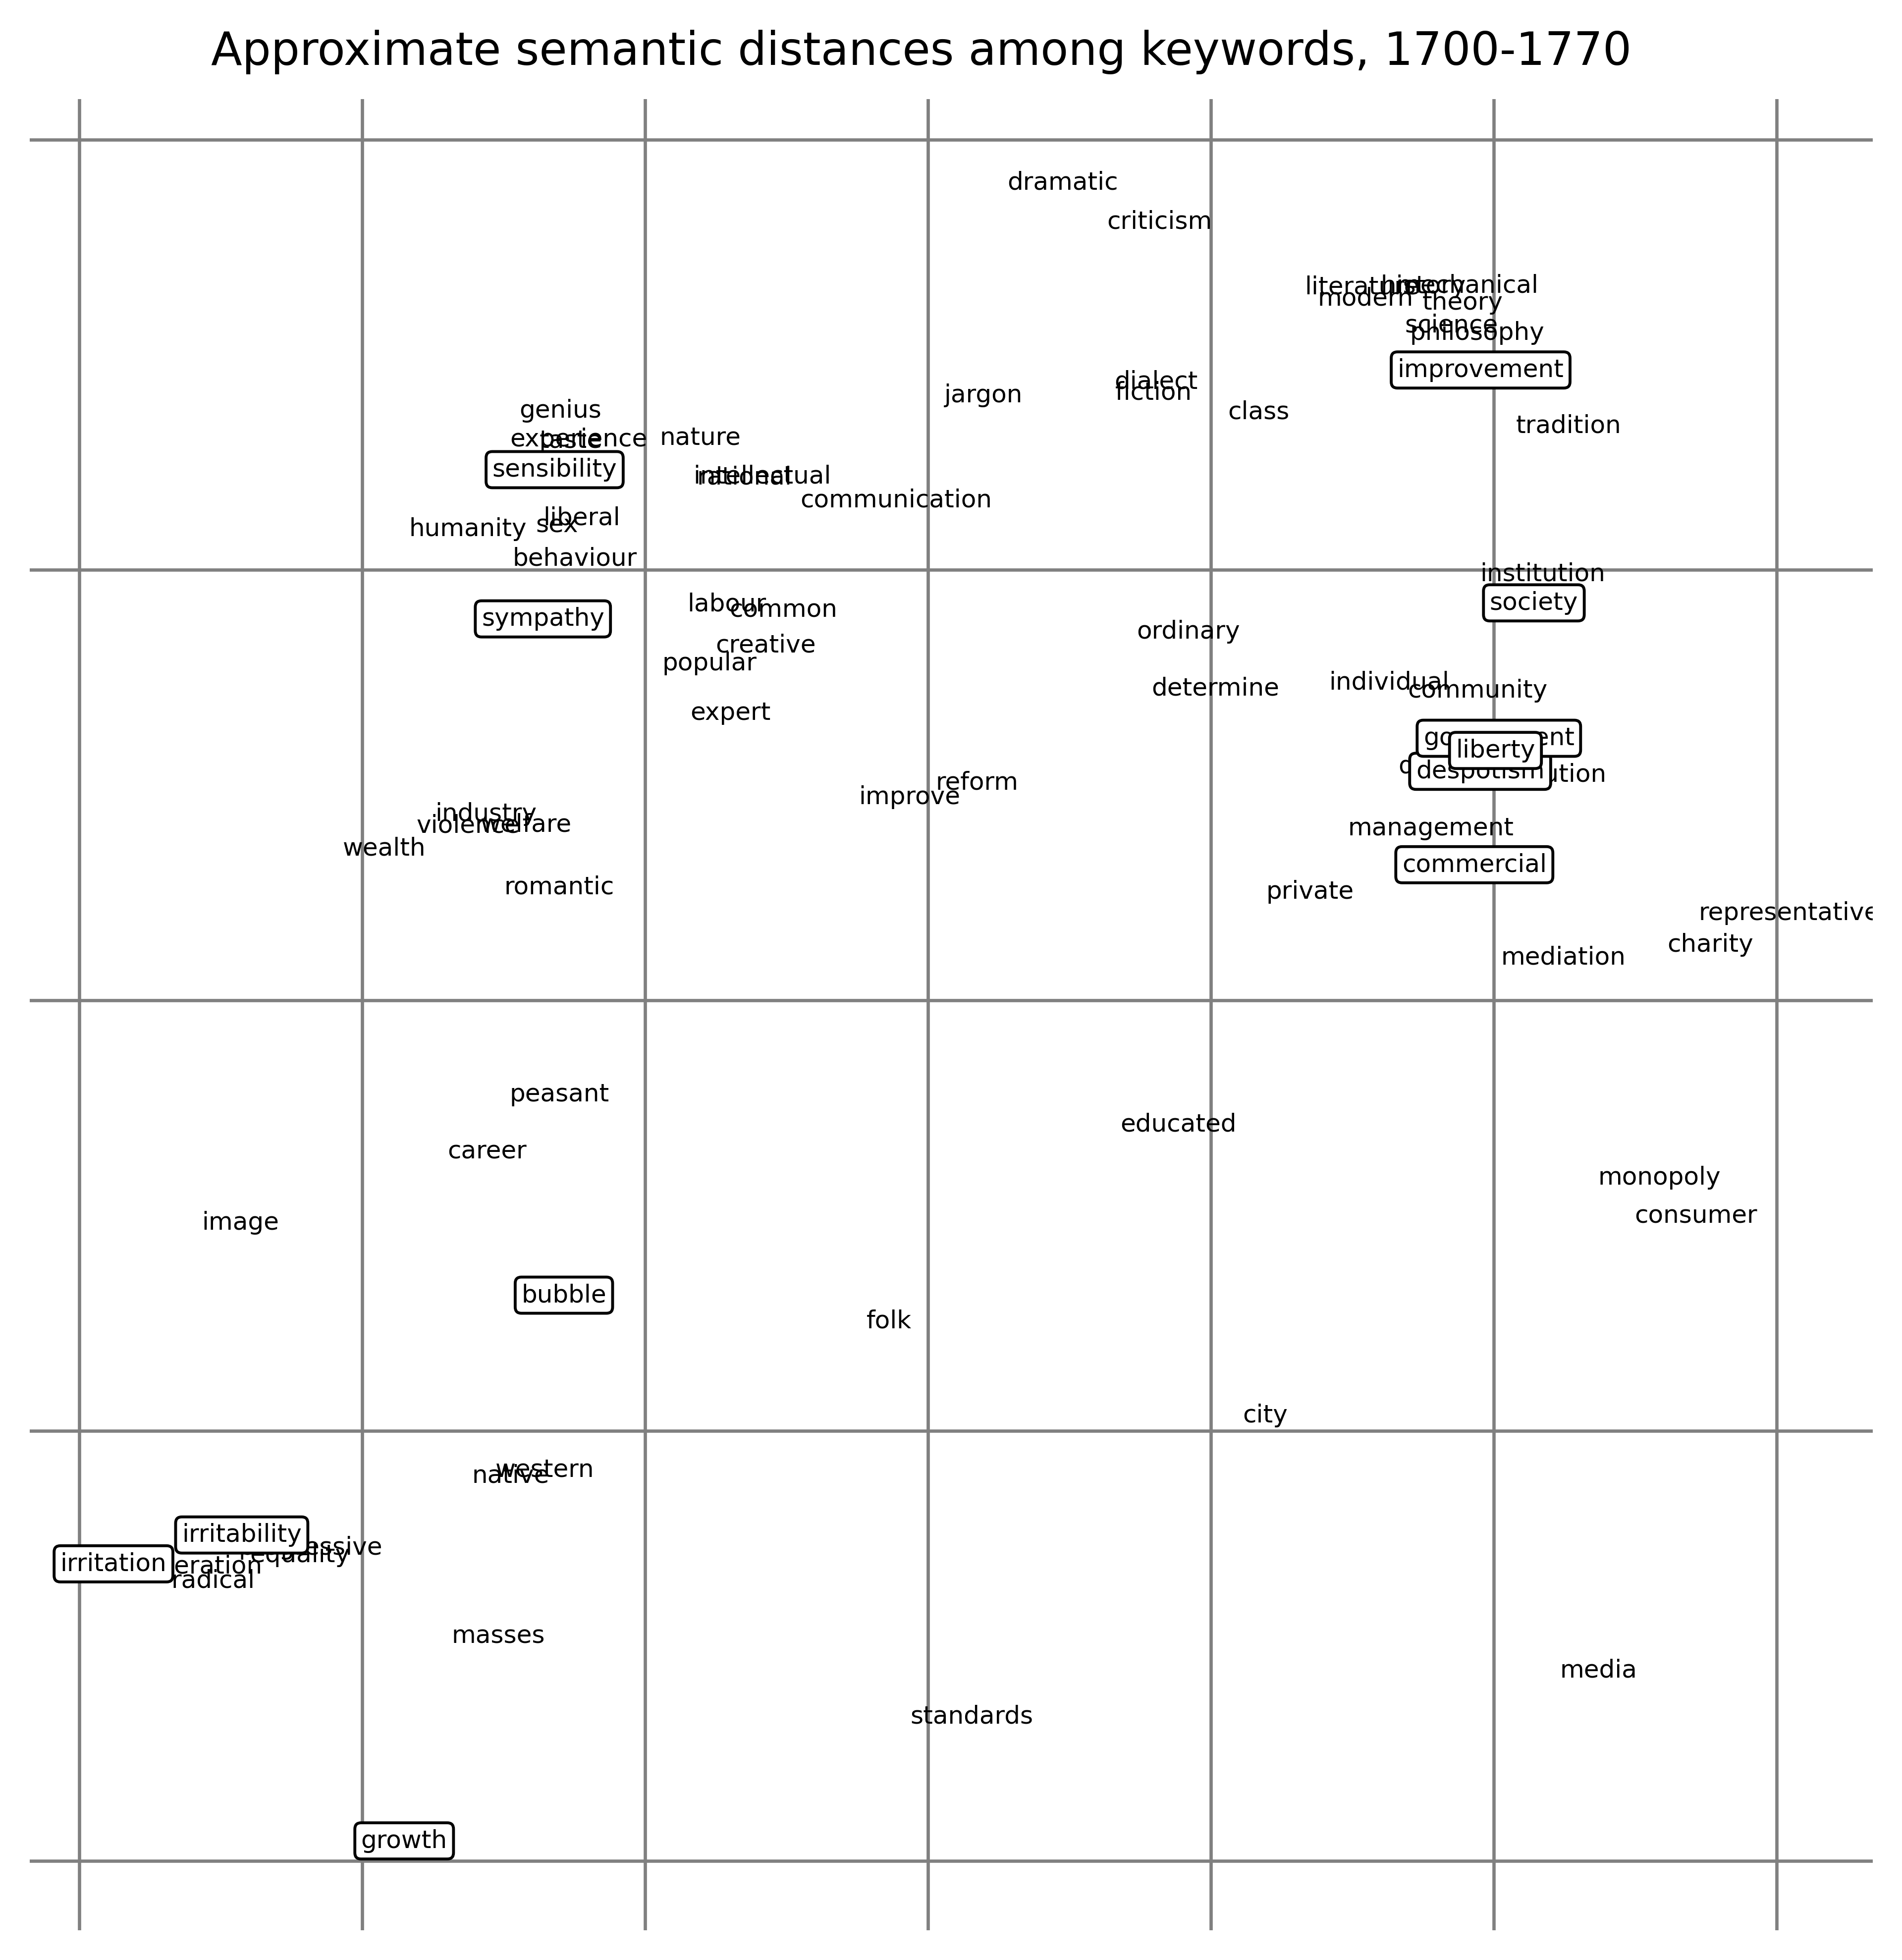

<ggplot: (8752790951690)>

In [11]:
plot_umap(figdf1,period=period1)

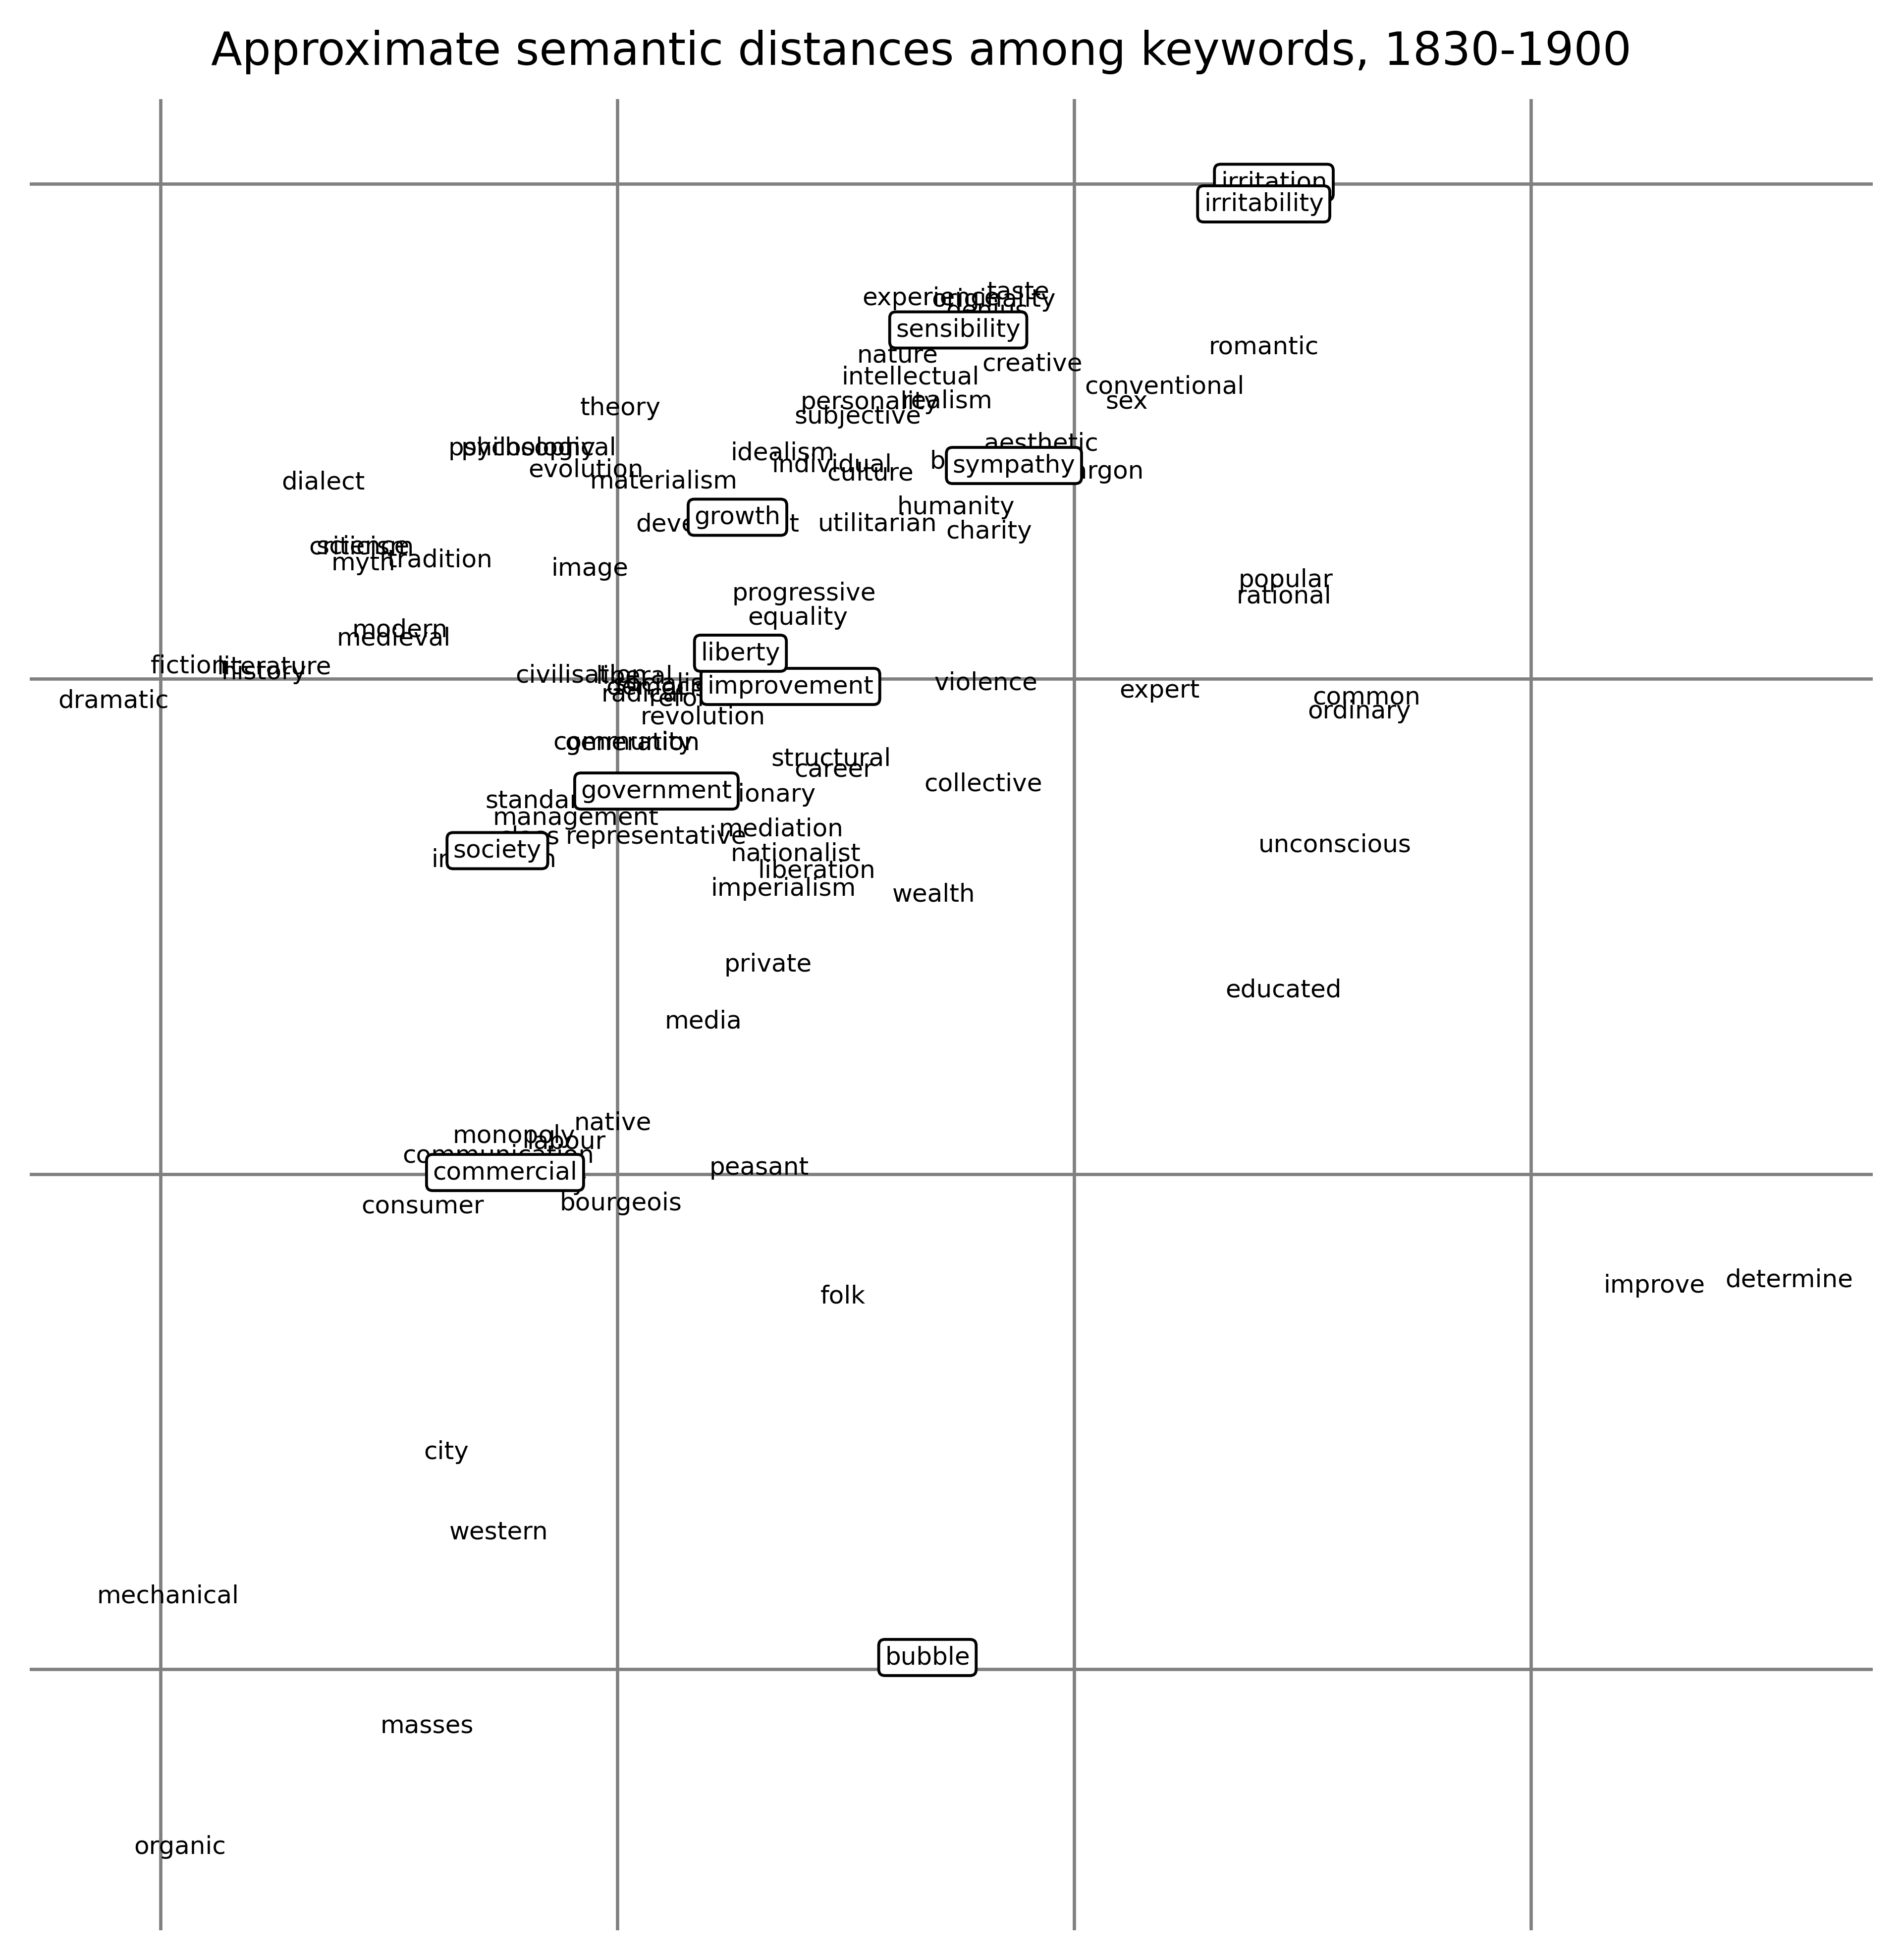

<ggplot: (8752790835842)>

In [12]:
plot_umap(figdf2,period2)

## Distance matrices

In [13]:
def get_dfdist_embed(words=None,lim_cols=None):
    dfdist1=vdist(period1,max_runs=10).dropna()
    dfdist2=vdist(period2,max_runs=10).dropna()
#     if words:
#         words=set(words)
#         dfdist1=dfdist1[[w for w in dfdist1.index if w in words]]
#         dfdist2=dfdist2[[w for w in dfdist2.index if w in words]]
#         dfdist1=dfdist1[[c for c in dfdist1.columns if c in words]]
#         dfdist2=dfdist2[[c for c in dfdist2.columns if c in words]]
    dfdist1.index=[f'{w}_{period1}' for w in dfdist1.index]
    dfdist2.index=[f'{w}_{period2}' for w in dfdist2.index]
    dfdist=dfdist1.append(dfdist2).dropna(axis=1)
    dfdist = dfdist[list(dfdist.columns)[:lim_cols]]
    dfdist_embed = to_umap(dfdist)
    return dfdist_embed

In [14]:
dfdist_embed = get_dfdist_embed(lim_cols=None,words=get_keywords())
dfdist_embed

,U1,U2
word,,
abandon_1700-1770,6.476782,7.717726
abandoned_1700-1770,7.323890,7.430264
abandoning_1700-1770,6.956273,7.307744
abate_1700-1770,7.775172,7.483696
abatement_1700-1770,6.452728,8.275126
...,...,...
zinc_1830-1900,-1.640222,3.516123
zone_1830-1900,0.404205,3.984600
zoo_1830-1900,0.419043,1.143302


In [15]:
def get_figdf_dist():
    figdf_dist = dfdist_embed.rename_axis('word_period')
    figdf_dist['word'],figdf_dist['period']=zip(*[x.split('_') for x in figdf_dist.index])
    figdf_dist=figdf_dist.reset_index().set_index('word')
    figdf_dist=get_figdf_kw(figdf_dist)
    return figdf_dist

In [16]:
figdf_dist = get_figdf_dist()

In [17]:
figdf_dist.period.value_counts()

1830-1900    77
1700-1770    69
Name: period, dtype: int64

In [18]:
def plot_figdf_dist(figdf):
    fig=start_fig(
        figdf_dist,
        x='U1',y='U2',
        shape='period',label='word',color='period',
    )
    fig+=p9.scale_x_reverse()
    fig+=p9.scale_y_reverse()
    fig+=p9.geom_text(data=figdf[figdf.in_author!='EDHI'], size=6)
    fig+=p9.geom_label(data=figdf[figdf.in_author=='EDHI'], size=6)
    fig+=p9.scale_color_gray(start=.25, end=0)
    fig+=p9.ggtitle(f'Words\' semantic distances from two models ({period1} vs. {period2}) cannot be easily compared')
    return fig

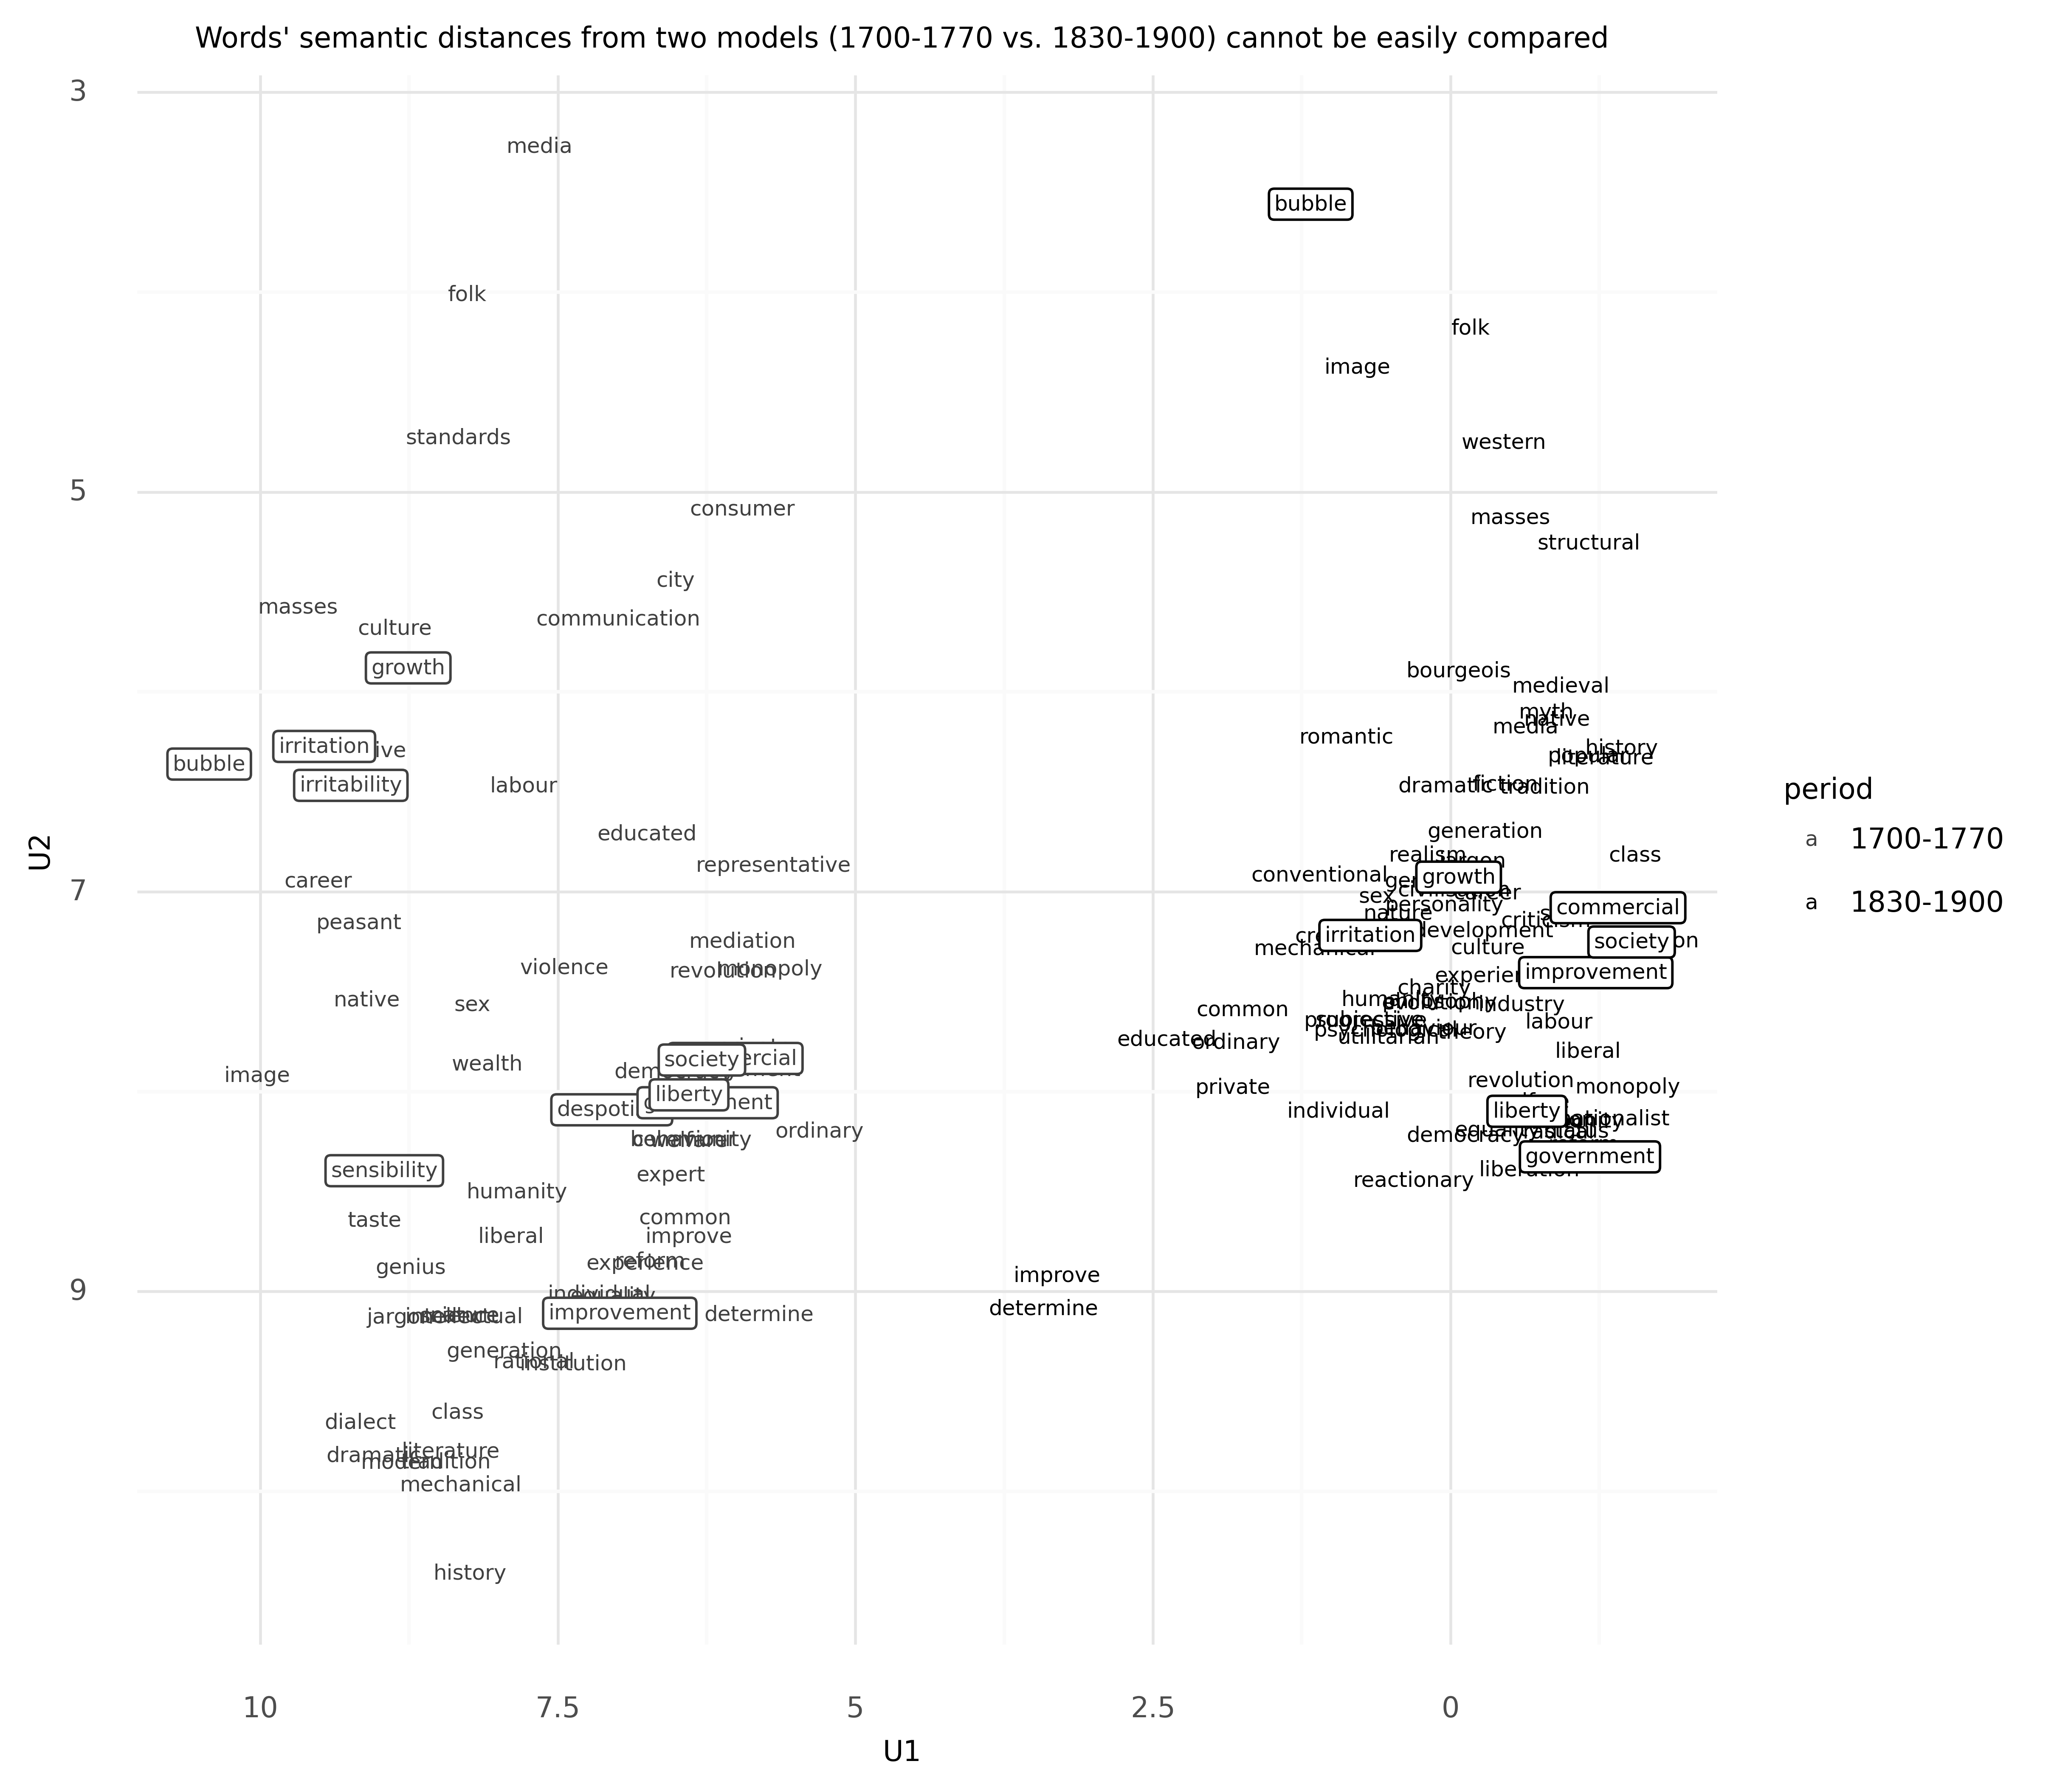

<ggplot: (8752791447670)>

In [19]:
plot_figdf_dist(figdf_dist)